
### <font color=green> Data Preprocessing</font>
- Data preprocessing is a process transforming raw data into a clean, organized format that's suitable for machine learning models. 
  - This process is crucial because:
  - It improves data quality, leading to better accuracy and increased efficiency in machine learning model results.
  - It prepares the data in a format that machine learning algorithms can understand and work with efficiently.
- Real-world data is often messy, containing 
    * Noise, irrelevant data points that do not provide meaningful information. For Example A passenger’s age recorded as 300 or -10 would be considered noise.
    * Missing values, These are data points that are absent or not recorded in the dataset such as (NaN, None)
    * Duplicate samples, Two identical records for the same passenger in the Titanic dataset, with the same name, age, and other details.
    * Incorrect data, For example, the value entered for month is likely to be a number from 1 to 12
    * Inconsistencies, This refers to data that follows inconsistent formatting, for Example In a dataset of birthdays, some dates might be formatted as MM/DD/YYYY while others are DD-MM-YYYY, creating inconsistency in the date format.
    * Unsuitable formats, This refers to data that is not in a format that can be directly input into machine learning algorithms like categorical features, text, image, ...
  * 
- Preprocessing is essential for building effective Machine Learning models, as it makes data suitable for analysis and modeling.
  
<img src="./images/data_preprocessing.png" alt="either local or remote" width=800 >


#### 1. Importing libraries

Popular Python libraries:
* NumPy: short for Numerical Python, is the most basic and a powerful package used for numerical operations.
* Pandas: pandas is used for data manipulation and analysis, It provides rich data structures and functions designed to make working with structured data fast, easy, and expressive. 
* seaborn and matplotlib: matplotlib is the most popular Python library for producing plots and other 2D data visualizations.
* SciPy: is a collection of packages addressing a number of different standard problem domains in scientific computing
* sklearn.preprocessing provides tools for encoding categorical data, including LabelEncoder and OneHotEncoding
* sklearn.preprocessing provides tools for Scaling Features, including StandardScaler, MinMaxScaler
  

In [4]:
%matplotlib inline
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

#### 1. Import the dataset
- Titanic dataset is a common dataset contains information about passengers on the Titanic, including whether they survived or not, Here are some key features:
- PassengerId: Unique ID for each passenger
- Survived: Target variable contains Whether the passenger survived(1 = survived, 0 = did not survive)
- Pclass: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd class)
- Name: Name of the passenger
- Sex: Gender of the passenger
- Age: Age of the passenger
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare paid for the ticket
- Cabin: Cabin number
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [92]:
Titanic_Data = pd.read_csv('./data/Titanic_Data.csv', delimiter=',')


#### 2. Visualization, Exploring and Understanding the Dataset

In [30]:
# Take a quick look at the first few rows of the dataset
Titanic_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(Titanic_Data.shape)

(891, 12)


In [8]:
# To known what are the columns in your dataset
Titanic_Data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# Calculate the value counts
value_counts = Titanic_Data['Survived'].value_counts()

print(f"Not Survived: {value_counts[0]}")
print(f"Survived: {value_counts[1]}")

Not Survived: 549
Survived: 342


Text(0.5, 1.0, 'Survived count \n (0: Control ; 1: Not survived")')

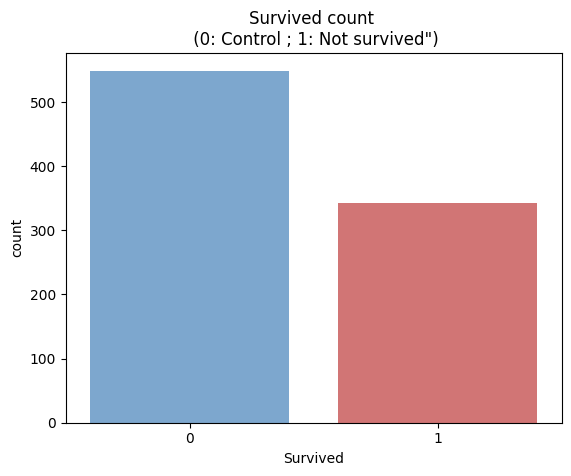

In [10]:
# Display a bar plot for how many instances we have for each class in the Target feature (Survived)
custom_palette = ['#6FA8DC', '#E06666', '#93C47D']

graph = sns.countplot(x='Survived', data=Titanic_Data, palette=custom_palette)

# Plot Settings
plt.title('Survived count \n (0: Control ; 1: Not survived")')


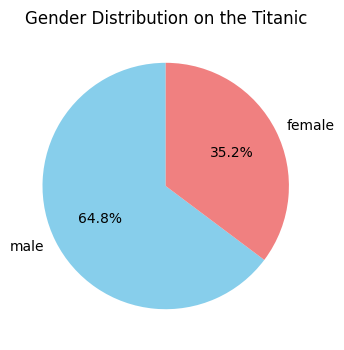

In [11]:
# Create the pie chart for Gender Distribution

gender_counts = Titanic_Data['Sex'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution on the Titanic')
plt.show()

- Display the relation between the Gender and survived Passenger 

In [12]:
class_survival = Titanic_Data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
class_survival = class_survival.sort_values(by='Survived', ascending=False)
class_survival

,Sex,Survived
0,female,0.742038
1,male,0.188908


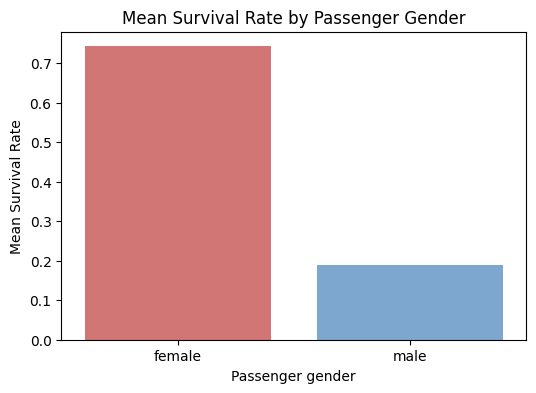

In [13]:
# Select the two columns and Group by Gender then calculate the mean of 'Survived'
class_survival = Titanic_Data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

custom_palette1 = ['#E06666', '#6FA8DC']
# Sort by the survival rate
class_survival = class_survival.sort_values(by='Survived', ascending=False)

# Plot a bar chart to show mean survival by Sex
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=class_survival, palette=custom_palette1)


# Add titles and labels
plt.title('Mean Survival Rate by Passenger Gender')
plt.xlabel('Passenger gender')
plt.ylabel('Mean Survival Rate')

# Show the plot
plt.show()

- Display the relation between the Pclass and survived Passenger 

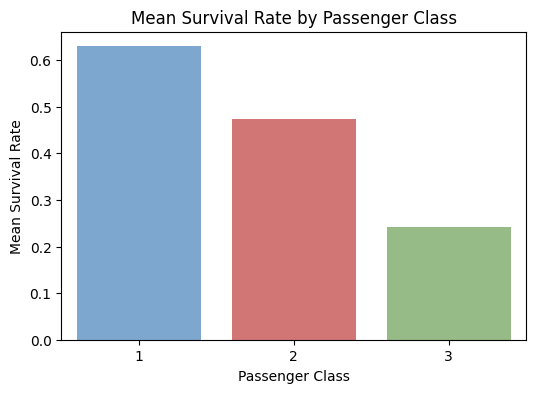

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [14]:
# Group by 'Pclass' and calculate the mean of 'Survived'
class_survival = Titanic_Data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

# Sort by the survival rate
class_survival = class_survival.sort_values(by='Survived', ascending=False)

# Plot a bar chart to show mean survival by Pclass
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=class_survival, palette=custom_palette)

# Add titles and labels
plt.title('Mean Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Mean Survival Rate')

# Show the plot
plt.show()

print(class_survival)


In [15]:
# Check basic information about the dataset (columns, null values, data types)
Titanic_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
# Get the number of null values in the dataset
Titanic_Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 3. Cleaning the Dataset
- 3.1 Delete duplicate sample.
- 3.2 Handling  missing Data (NaN value) (dropna, fillno). We'll first remove rows with a high percentage of null values, then remove columns with a high percentage of null values.
- 3.3 Delete Irrelevant Features(PassengerId, Name, and Ticket).
- 3.4 Handling An Unsuitable Format by Encoding Category Data by using OneHotEncoding or Label encoding
  - OneHotEncoding which generates binary columns for each category while label encoding provides each category a unique numeric label.

3.1 Delete Duplicate Sample

In [59]:
# Check duplicated rows
duplicated_rows = Titanic_Data[Titanic_Data.duplicated(keep=False)]
duplicated_rows
# delete all the duplicated rows by keeping the first one and droping the rest 
# Titanic_Data = Titanic_Data.drop_duplicates(keep='first')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


#### 3.2 Handling Missing Data
* Drop rows where all values are null
* Drop columns where all values are null
* Dropping rows with  missing values for most of the  columns (70 percent)
* Dropping columns with  missing values for most of the  columns (70 percent)

In [93]:
print("Before rows:", len(Titanic_Data), "columns:", Titanic_Data.shape[1])

# Drop rows where all values are null
Titanic_Data.dropna(how='all', inplace=True)

# Drop columns where all values are null
Titanic_Data.dropna(axis=1, how='all', inplace=True)

# Dropping rows with  missing values for most of the  columns (70 percent)
row_threshold = int(len(Titanic_Data.columns) * 0.4)
Titanic_Data.dropna(axis=0, thresh=row_threshold, inplace=True)

# Dropping columns with  missing values for most of the  columns (70 percent)
col_threshold = int(len(Titanic_Data) * 0.7)
Titanic_Data.dropna(axis=1, thresh=col_threshold, inplace=True)

print("After rows:", len(Titanic_Data), "columns:", Titanic_Data.shape[1])


Before rows: 891 columns: 12
After rows: 891 columns: 11


In [61]:
Titanic_Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [94]:
# To decide whether to use the mean, median, or mode for filling missing values in a dataset (the type of data and its distribution, numerical or categorical)
# For Age we will use median could have outliers (very young or very old passengers), which would skew the mean. 
Titanic_Data['Age'].fillna(Titanic_Data['Age'].median(), inplace=True)
# For Embarked feature ('S', 'C', 'Q') representing different embarkation ports, we will use 'mode' the most frequent embarkation point is used.
Titanic_Data['Embarked'].fillna(Titanic_Data['Embarked'].mode()[0], inplace=True)

In [73]:
Titanic_Data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [64]:
Titanic_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


3.3 Delete Irrelevant Features(PassengerId, Name, and Ticket)
- These columns are not useful for model training or data preprocessing.

In [95]:
# Drop columns: PassengerId, Name, and Ticket
Titanic_Data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

- 3.4 Handling An Unsuitable Format by Encoding Category Data by using OneHotEncoding or Label encoding
  - OneHotEncoding which generates binary columns for each category.
  - Label encoding provides each category a unique numeric label, Label Encoding is suitable when there's an ordinal relationship between categories ('low', 'medium', 'high') or for feature that has only two categories like gender.

In [75]:
Titanic_Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [96]:
# Label Encoding for 'Sex' column
le = LabelEncoder()
Titanic_Data['Sex'] = le.fit_transform(Titanic_Data['Sex'])

In [97]:
Titanic_Data1 = pd.get_dummies(Titanic_Data, columns=['Embarked'], drop_first=True)

In [99]:
Titanic_Data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [101]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the 'Embarked' column
embarked_encoded = encoder.fit_transform(Titanic_Data[['Embarked']])

# Convert to DataFrame
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=encoder.get_feature_names_out(['Embarked']))

# Concatenate with original DataFrame
Titanic_Data2 = pd.concat([Titanic_Data, embarked_encoded_df], axis=1)

# Drop original 'Embarked' column
Titanic_Data2.drop(columns=['Embarked'], inplace=True)


c:\Users\Shaima\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [107]:
Titanic_Data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [106]:
# The original data before applying one hot encoding
Titanic_Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


##### Feature Scaling
Feature scaling including StandardScaler, MinMaxScaler
Feature scaling should be applied after splitting your data into training and testing sets.
- StandardScaler: Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.
- MinMaxScaler scales features to a fixed range, usually [0, 1].


In [113]:
# StandardScaler
standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(Titanic_Data2['Age','Fare'])

# Convert scaled data back to DataFrame
data_standard_scaled_df = pd.DataFrame(data_standard_scaled, columns=Titanic_Data2.columns)

In [115]:
# Correctly select the columns to scale
columns_to_scale = ['Age', 'Fare']

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Fit and transform the selected columns
data_standard_scaled = standard_scaler.fit_transform(Titanic_Data2[columns_to_scale])

# Convert scaled data back to DataFrame with appropriate column names
data_standard_scaled_df = pd.DataFrame(data_standard_scaled, columns=columns_to_scale)

# Optionally, you can concatenate this scaled data with the rest of the original DataFrame
Titanic_Data2_scaled = pd.concat([Titanic_Data2.drop(columns=columns_to_scale), data_standard_scaled_df], axis=1)


In [116]:
Titanic_Data2_scaled

,Survived,Pclass,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Age,Fare
0,0,3,1,1,0,0.0,0.0,1.0,-0.565736,-0.502445
1,1,1,0,1,0,1.0,0.0,0.0,0.663861,0.786845
2,1,3,0,0,0,0.0,0.0,1.0,-0.258337,-0.488854
3,1,1,0,1,0,0.0,0.0,1.0,0.433312,0.420730
4,0,3,1,0,0,0.0,0.0,1.0,0.433312,-0.486337
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,0.0,0.0,1.0,-0.181487,-0.386671
887,1,1,0,0,0,0.0,0.0,1.0,-0.796286,-0.044381
888,0,3,0,1,2,0.0,0.0,1.0,-0.104637,-0.176263
889,1,1,1,0,0,1.0,0.0,0.0,-0.258337,-0.044381


In [110]:
Titanic_Data2.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


##### Save the Preprocessing and cleaning dataset 

In [ ]:
# save the dataframe to csv file.
Titanic_Data.to_csv("Titanc_Dataset_Cleaned.csv")